# Machine Learning For Managers (Term-03)
# Project -01

# Project Title -:

# "Understanding Traffic Patterns in Futuristic Urban Environments with K-Means and DBSCAN"

Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption.

#Objectives
#Objective 01: Clustering or Segment the Data

The primary objective of this project is to apply clustering techniques to the Urban traffic density in cities dataset in order to segment the employees based on certain characteristics. Clustering allows us to group similar individuals together, enabling us to identify patterns and gain insights into the underlying structure of the data.

#Objective 02: Determine the Number of Segments/Clusters

Another important objective is to determine the optimal number of segments or clusters in the dataset. Identifying the appropriate number of clusters is crucial for meaningful segmentation and interpretation of the results. We will use methods such as the elbow method, silhouette score, and/or silhouette analysis to determine the optimal number of clusters.

#Objective 03: Explore Characteristics of Segments/Clusters

Once the data is segmented into clusters, the next objective is to explore the characteristics of each segment or cluster. This involves analyzing the distribution of various attributes within each cluster, such as salary levels, job titles, and other demographic or employment-related features. By understanding the unique characteristics of each cluster, we can gain valuable insights into the different groups of employees within the organization.

In [4]:
# Install PyDataset
!pip install pydataset

# @title load library { display-mode: "form" }
# Load IPython extension for measuring time
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

time: 6.95 s (started: 2024-03-17 18:53:01 +00:00)


# Importing Libraries

In [5]:
# Required Libraries
from pydataset import data
import random as rnd, numpy as np
import matplotlib.pyplot as plt
import pandas as pd, numpy as np # For Data Manipulation
import scipy.stats as sps # For Probability & Inferential Statistics
import statsmodels.api as sm
import statsmodels as sm, statsmodels.formula.api as smf # For Descriptive Statistics & Regression

from memory_profiler import memory_usage
import time

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation



time: 3.71 s (started: 2024-03-17 18:53:08 +00:00)


In [6]:
# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 104 ms (started: 2024-03-17 18:53:11 +00:00)


# Data Loading

In [7]:
# Import & Read Dataset
df = pd.read_csv('/content/futuristic_city_traffic - Copy.csv')

# Display & Describe Dataset Information
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
53896,MetropolisX,Autonomous Vehicle,Snowy,Booming,Friday,10,45.8221,0,0,43.8489,0.4784
53897,Neuroburg,Autonomous Vehicle,Electromagnetic Storm,Recession,Tuesday,22,38.7085,0,0,37.0417,0.0424
53898,AquaCity,Autonomous Vehicle,Solar Flare,Booming,Saturday,2,90.7418,0,0,72.5934,0.5811
53899,MetropolisX,Autonomous Vehicle,Solar Flare,Recession,Saturday,5,60.8918,0,0,87.8670,0.1985


time: 289 ms (started: 2024-03-17 18:53:11 +00:00)


In [8]:
# Create an index variable
df['index_variable'] = range(len(df))

# Set the index to the new index variable
df.set_index('index_variable', inplace=True)

# Display the DataFrame with the new index variable

df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
index_variable,,,,,,,,,,,
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
53896,MetropolisX,Autonomous Vehicle,Snowy,Booming,Friday,10,45.8221,0,0,43.8489,0.4784
53897,Neuroburg,Autonomous Vehicle,Electromagnetic Storm,Recession,Tuesday,22,38.7085,0,0,37.0417,0.0424
53898,AquaCity,Autonomous Vehicle,Solar Flare,Booming,Saturday,2,90.7418,0,0,72.5934,0.5811


time: 162 ms (started: 2024-03-17 18:53:12 +00:00)


Data Bifurcation into categorical and non-categorical

In [9]:
# Subset of Categorical Variables
df_cat = df[['City', 'Weather', 'Economic Condition', 'Day Of Week', 'Vehicle Type']]
df_cat


,City,Weather,Economic Condition,Day Of Week,Vehicle Type
index_variable,,,,,
0,SolarisVille,Snowy,Stable,Sunday,Drone
1,AquaCity,Solar Flare,Recession,Wednesday,Flying Car
2,Neuroburg,Solar Flare,Recession,Wednesday,Autonomous Vehicle
3,Ecoopolis,Clear,Booming,Thursday,Drone
4,AquaCity,Solar Flare,Stable,Saturday,Autonomous Vehicle
...,...,...,...,...,...
53896,MetropolisX,Snowy,Booming,Friday,Autonomous Vehicle
53897,Neuroburg,Electromagnetic Storm,Recession,Tuesday,Autonomous Vehicle
53898,AquaCity,Solar Flare,Booming,Saturday,Autonomous Vehicle


time: 125 ms (started: 2024-03-17 18:53:12 +00:00)


In [10]:
# Subset of Non-Categorical Variables
df_noncat = df[['Speed', 'Energy Consumption', 'Traffic Density']]
df_noncat

,Speed,Energy Consumption,Traffic Density
index_variable,,,
0,29.4268,14.7134,0.5241
1,118.8000,143.5682,0.3208
2,100.3904,91.2640,0.0415
3,76.8000,46.0753,0.1811
4,45.2176,40.1934,0.4544
...,...,...,...
53896,45.8221,43.8489,0.4784
53897,38.7085,37.0417,0.0424
53898,90.7418,72.5934,0.5811


time: 46.7 ms (started: 2024-03-17 18:53:12 +00:00)


#Section-02 (Descriptive Statistics)

For Categorical Variables

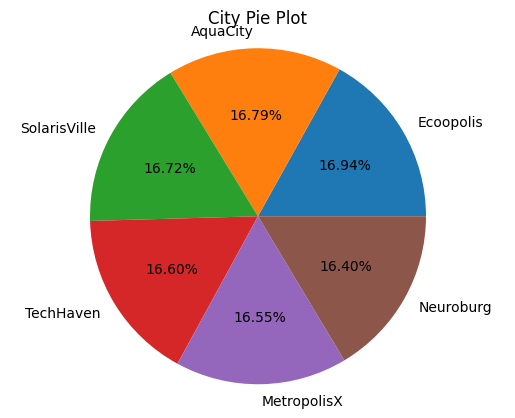

,index,count,percentage
0,Ecoopolis,9129,17.0
1,AquaCity,9049,17.0
2,SolarisVille,9013,17.0
3,TechHaven,8947,17.0
4,MetropolisX,8921,17.0
5,Neuroburg,8842,16.0


time: 301 ms (started: 2024-03-17 18:53:12 +00:00)


In [11]:
# Count Statistics of Categorical Variables
#For City
City_stats = pd.concat([df_cat['City'].value_counts(), df['City'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(City_stats['count'], labels=City_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('City Pie Plot')
plt.show()
City_stats

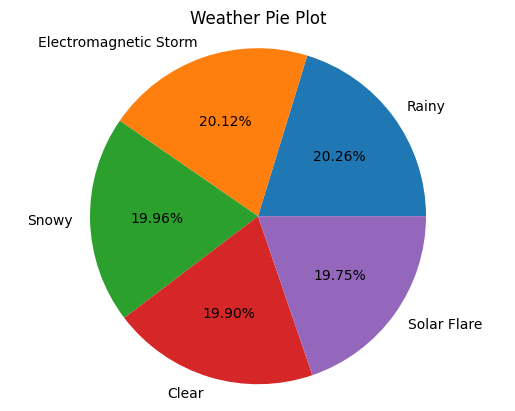

,index,count,percentage
0,Rainy,10922,20.0
1,Electromagnetic Storm,10846,20.0
2,Snowy,10759,20.0
3,Clear,10727,20.0
4,Solar Flare,10647,20.0


time: 282 ms (started: 2024-03-17 18:53:12 +00:00)


In [12]:
#For Weather
Weather_stats = pd.concat([df['Weather'].value_counts(), df['Weather'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(Weather_stats['count'], labels=Weather_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Weather Pie Plot')
plt.show()
Weather_stats

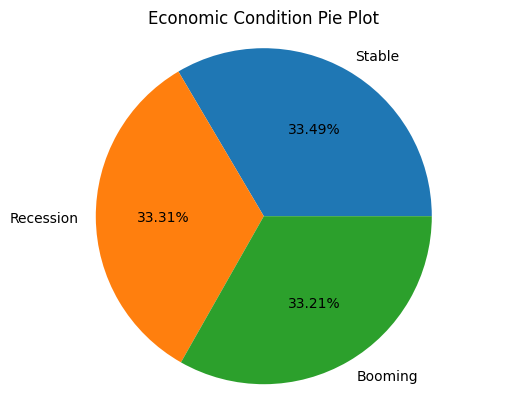

,index,count,percentage
0,Stable,18050,33.0
1,Recession,17953,33.0
2,Booming,17898,33.0


time: 240 ms (started: 2024-03-17 18:53:13 +00:00)


In [13]:
#For Economic_Condition
Economic_Condition_stats = pd.concat([df['Economic Condition'].value_counts(), df['Economic Condition'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Economic_Condition_stats['count'], labels=Economic_Condition_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Economic Condition Pie Plot')
plt.show()
Economic_Condition_stats

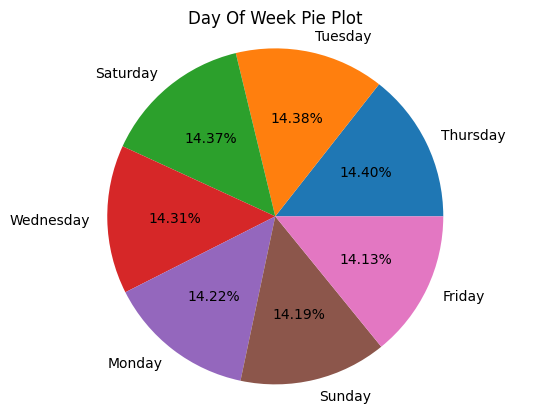

,index,count,percentage
0,Thursday,7763,14.0
1,Tuesday,7749,14.0
2,Saturday,7746,14.0
3,Wednesday,7714,14.0
4,Monday,7665,14.0
5,Sunday,7646,14.0
6,Friday,7618,14.0


time: 199 ms (started: 2024-03-17 18:53:13 +00:00)


In [14]:
#For Day Of Week
Day_Of_Week_stats = pd.concat([df['Day Of Week'].value_counts(), df['Day Of Week'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Day_Of_Week_stats['count'], labels=Day_Of_Week_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Day Of Week Pie Plot')
plt.show()
Day_Of_Week_stats

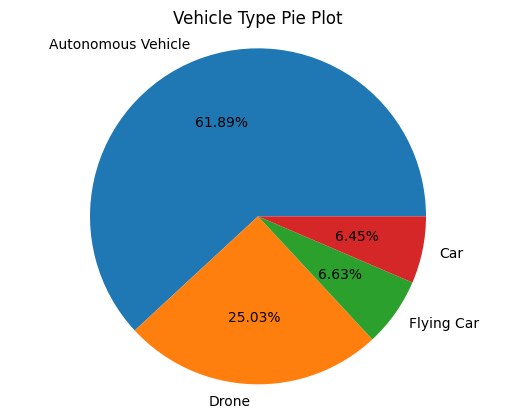

,index,count,percentage
0,Autonomous Vehicle,33357,62.0
1,Drone,13493,25.0
2,Flying Car,3575,7.0
3,Car,3476,6.0


time: 161 ms (started: 2024-03-17 18:53:13 +00:00)


In [15]:
#For Vehicle Type
Vehicle_Type_stats = pd.concat([df['Vehicle Type'].value_counts(), df['Vehicle Type'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Vehicle_Type_stats['count'], labels=Vehicle_Type_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Vehicle Type Pie Plot')
plt.show()
Vehicle_Type_stats

For Non-Categorical Variables

Mean of Speed is = 59.95
St. Dev. of Speed is = 26.57


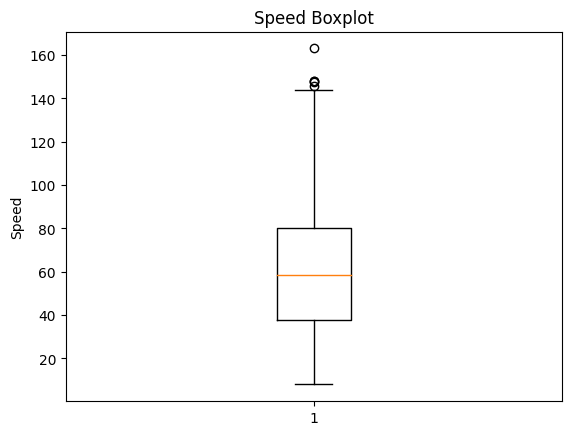

time: 220 ms (started: 2024-03-17 18:53:13 +00:00)


In [16]:
# Mean (Speed)
Speed_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Speed is =", Speed_mean)
# Std. Dev. (mpg)
Speed_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Speed is =", Speed_sd)

plt.boxplot(df_noncat['Speed'])
plt.ylabel('Speed')
plt.title('Speed Boxplot')
plt.show()

Mean of Energy Consumption is = 59.95
St. Dev. of Energy Consumption is = 59.95


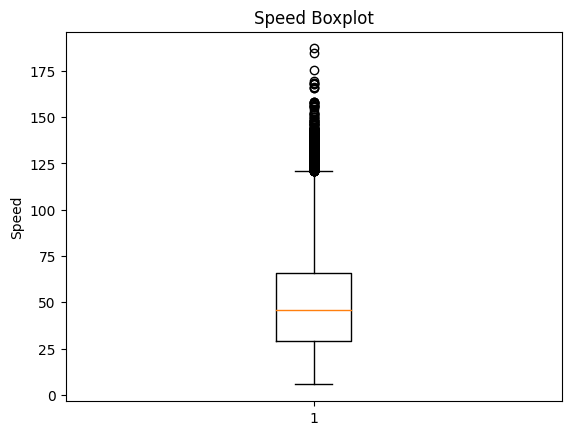

time: 227 ms (started: 2024-03-17 18:53:14 +00:00)


In [17]:
# Mean (Energy Consumption)
Energy_Consumption_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Energy Consumption is =", Energy_Consumption_mean)
# Std. Dev. (mpg)
Energy_Consumption_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Energy Consumption is =", Energy_Consumption_mean)

plt.boxplot(df_noncat['Energy Consumption'])
plt.ylabel('Speed')
plt.title('Speed Boxplot')
plt.show()

Mean of Traffic Density is = 59.95
St. Dev. of Traffic Density is = 26.57


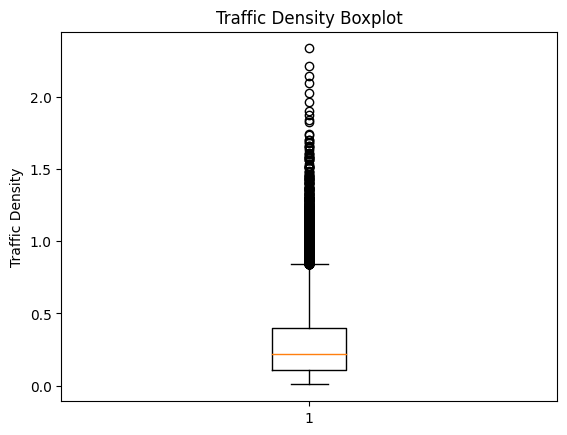

time: 336 ms (started: 2024-03-17 18:53:14 +00:00)


In [18]:
# Mean (Traffic Density)
Traffic_Density_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Traffic Density is =", Traffic_Density_mean)
# Std. Dev. (mpg)
Traffic_Density_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Traffic Density is =", Traffic_Density_sd)

plt.boxplot(df_noncat['Traffic Density'])
plt.ylabel('Traffic Density')
plt.title('Traffic Density Boxplot')
plt.show()

#Section-03 (Data Analysis)

#1.) Data Pre-Processing

MISSING DATA INFORMATION

In [19]:
# Dataframe Information (Provide Information on Missing Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53901 entries, 0 to 53900
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   53901 non-null  object 
 1   Vehicle Type           53901 non-null  object 
 2   Weather                53901 non-null  object 
 3   Economic Condition     53901 non-null  object 
 4   Day Of Week            53901 non-null  object 
 5   Hour Of Day            53901 non-null  int64  
 6   Speed                  53901 non-null  float64
 7   Is Peak Hour           53901 non-null  int64  
 8   Random Event Occurred  53901 non-null  int64  
 9   Energy Consumption     53901 non-null  float64
 10  Traffic Density        53901 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.9+ MB
time: 58.9 ms (started: 2024-03-17 18:53:14 +00:00)


In [20]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

time: 48.8 ms (started: 2024-03-17 18:53:14 +00:00)


In [21]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data.describe()

count    50000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

time: 58.6 ms (started: 2024-03-17 18:53:14 +00:00)


# Ordinal Encoding (Superior)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
# Dataset Used : df_cat
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat.columns);
#Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_oe

,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,4.0,3.0,2.0,3.0,2.0
1,0.0,4.0,1.0,6.0,3.0
2,3.0,4.0,1.0,6.0,0.0
3,1.0,0.0,0.0,4.0,2.0
4,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0
53897,3.0,1.0,1.0,5.0,0.0
53898,0.0,4.0,0.0,2.0,0.0
53899,2.0,4.0,1.0,2.0,0.0


time: 97 ms (started: 2024-03-17 18:53:14 +00:00)


Data Transformation & Rescaling [Treatment of Outliers]

In [23]:
#Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['Speed','Energy Consumption','Traffic Density']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat.columns);
df_noncat_minmax_norm
# Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler

,Speed,Energy Consumption,Traffic Density
0,0.138433,0.050169,0.221984
1,0.714521,0.759961,0.134693
2,0.595855,0.471845,0.014770
3,0.443795,0.222925,0.074710
4,0.240218,0.190525,0.192057
...,...,...,...
53896,0.244115,0.210661,0.202362
53897,0.198262,0.173164,0.015157
53898,0.533662,0.368999,0.246458
53899,0.341252,0.453133,0.082181


time: 40.5 ms (started: 2024-03-17 18:53:15 +00:00)


In [24]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,4.0,3.0,2.0,3.0,2.0
1,0.0,4.0,1.0,6.0,3.0
2,3.0,4.0,1.0,6.0,0.0
3,1.0,0.0,0.0,4.0,2.0
4,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0
53897,3.0,1.0,1.0,5.0,0.0
53898,0.0,4.0,0.0,2.0,0.0
53899,2.0,4.0,1.0,2.0,0.0


time: 37.9 ms (started: 2024-03-17 18:53:15 +00:00)


In [25]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,Speed,Energy Consumption,Traffic Density
0,0.138433,0.050169,0.221984
1,0.714521,0.759961,0.134693
2,0.595855,0.471845,0.014770
3,0.443795,0.222925,0.074710
4,0.240218,0.190525,0.192057
...,...,...,...
53896,0.244115,0.210661,0.202362
53897,0.198262,0.173164,0.015157
53898,0.533662,0.368999,0.246458
53899,0.341252,0.453133,0.082181


time: 36.4 ms (started: 2024-03-17 18:53:15 +00:00)


In [26]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd);
df_ppd # Pre-Processed Dataset

,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density
0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984
1,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693
2,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770
3,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710
4,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057
...,...,...,...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362
53897,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157
53898,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458
53899,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181


time: 60.1 ms (started: 2024-03-17 18:53:15 +00:00)


Creating a Copy of Pre-Processed Data Set

In [27]:
df_ppd_copy = df_ppd.copy();
df_ppd_copy

,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density
0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984
1,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693
2,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770
3,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710
4,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057
...,...,...,...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362
53897,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157
53898,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458
53899,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181


time: 64.3 ms (started: 2024-03-17 18:53:15 +00:00)


Annova & Chi Sq test

In [28]:
# df_ppd_copy_cat containing categorical variables
df_ppd_copy_cat = df_ppd_copy[['City','Vehicle Type','Weather','Economic Condition','Day Of Week']]
df_ppd_copy_noncat = df_ppd_copy[['Energy Consumption','Traffic Density','Speed']]

time: 7.95 ms (started: 2024-03-17 18:53:15 +00:00)


In [29]:
import scipy.stats as stats
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Vehicle Type'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square statistic: 3024.973383186575
P-value: 0.0
Degrees of freedom: 15
Expected frequencies: [[5600.03511994  583.5573366  2265.22990297  600.17764049]
 [5649.54366338  588.71642456 2285.25624756  605.4836645 ]
 [5520.82145044  575.30279587 2233.18775162  591.68800208]
 [5471.93176379  570.20819651 2213.41173633  586.44830337]
 [5577.75627539  581.23574702 2256.2180479   597.78992969]
 [5536.91172706  576.97949945 2239.69631361  593.41245988]]
time: 27.1 ms (started: 2024-03-17 18:53:15 +00:00)


In [30]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Weather'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 21.658325253659047
P-value: 0.3593348841670787
Degrees of freedom: 20
Expected frequencies: [[1800.86868518 1820.84662622 1833.60564739 1806.24090462 1787.43813658]
 [1816.78972561 1836.94428675 1849.81610731 1822.20943953 1803.24044081]
 [1775.3950205  1795.09036938 1807.66891152 1780.69124877 1762.15444982]
 [1759.67299308 1779.19392961 1791.66108235 1764.92232055 1746.5496744 ]
 [1793.70421699 1813.60267899 1826.31094043 1799.05506391 1780.32709968]
 [1780.56935864 1800.32210905 1812.937311   1785.88102262 1767.2901987 ]]
time: 20.7 ms (started: 2024-03-17 18:53:15 +00:00)


In [31]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Economic Condition'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 9.486541858465442
P-value: 0.4866330774312828
Degrees of freedom: 10
Expected frequencies: [[3004.74948517 3013.98298733 3030.2675275 ]
 [3031.31374186 3040.62887516 3057.05738298]
 [2962.24667446 2971.3495668  2987.40375874]
 [2936.01447097 2945.03675256 2960.94877646]
 [2992.79556966 3001.9923378  3018.21209254]
 [2970.88005788 2980.00948034 2996.11046177]]
time: 23.5 ms (started: 2024-03-17 18:53:15 +00:00)


In [32]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 27.797774862018127
P-value: 0.5811522389128098
Degrees of freedom: 30
Expected frequencies: [[1278.92399028 1286.81443758 1300.41286804 1283.62468229 1303.26685961
  1300.91651361 1295.0406486 ]
 [1290.23064507 1298.19084989 1311.90950075 1294.97289475 1314.78872377
  1312.41759893 1306.48978683]
 [1260.83334261 1268.61217788 1282.01825569 1265.46754235 1284.83187696
  1282.51477709 1276.72202742]
 [1249.668021   1257.37797072 1270.66533088 1254.26118254 1273.4540361
  1271.15745533 1265.41600341]
 [1273.83599562 1281.69505204 1295.23938331 1278.51798668 1298.08202074
  1295.74102521 1289.88853639]
 [1264.50800542 1272.30951188 1285.75466132 1269.1557114  1288.57648281
  1286.25262982 1280.44299735]]
time: 38.6 ms (started: 2024-03-17 18:53:15 +00:00)


In [33]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Vehicle Type'], df_ppd_copy_cat['Weather'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 23.113884236761127
P-value: 0.02677451363024118
Degrees of freedom: 12
Expected frequencies: [[6638.47681861 6712.12077698 6759.15389325 6658.28023599 6588.96827517]
 [ 691.76920651  699.44334985  704.3444834   693.83284169  686.61011855]
 [2685.28248084 2715.07166843 2734.09669579 2693.29301868 2665.25613625]
 [ 711.47149404  719.36420475  724.40492755  713.59390364  706.16547003]]
time: 38.3 ms (started: 2024-03-17 18:53:15 +00:00)


In [34]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Vehicle Type'], df_ppd_copy_cat['Economic Condition'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 8.417633406047486
P-value: 0.2090745714365281
Degrees of freedom: 6
Expected frequencies: [[11076.29888128 11110.3360049  11170.36511382]
 [ 1154.2169533   1157.76382627  1164.01922042]
 [ 4480.39394445  4494.16205636  4518.44399918]
 [ 1187.09022096  1190.73811247  1197.17166657]]
time: 29.7 ms (started: 2024-03-17 18:53:15 +00:00)


In [35]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Vehicle Type'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 25.83190905559193
P-value: 0.10366385933184874
Degrees of freedom: 18
Expected frequencies: [[4714.45104915 4743.53731842 4793.66471865 4731.77903935 4804.18528413
  4795.52128903 4773.86130127]
 [ 491.27415076  494.30511493  499.52869149  493.07983154  500.62499768
   499.72215729  497.46505631]
 [1907.00866403 1918.77414148 1939.05081538 1914.01788464 1943.30641361
  1939.80180331 1931.04027755]
 [ 505.26613606  508.38342517  513.75577448  507.12324447  514.88330458
   513.95475038  511.63336487]]
time: 37.5 ms (started: 2024-03-17 18:53:15 +00:00)


In [36]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Weather'], df_ppd_copy_cat['Economic Condition'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 16.014760311090857
P-value: 0.04216933317682201
Degrees of freedom: 8
Expected frequencies: [[3561.9347693  3572.88048459 3592.18474611]
 [3601.44910113 3612.51624274 3632.03465613]
 [3626.68514499 3637.82983618 3657.48501883]
 [3572.56047198 3583.53883972 3602.9006883 ]
 [3535.37051261 3546.23459676 3565.39489063]]
time: 33.9 ms (started: 2024-03-17 18:53:15 +00:00)


In [37]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Weather'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 16.376560046321956
P-value: 0.8740070713040451
Degrees of freedom: 24
Expected frequencies: [[1516.08107456 1525.43468581 1541.55473924 1521.65343871 1544.93796033
  1542.15177826 1535.18632307]
 [1532.89972357 1542.35709913 1558.65598041 1538.53390475 1562.07673327
  1559.25964268 1552.2169162 ]
 [1543.64104562 1553.16469082 1569.57778149 1549.31470659 1573.02250422
  1570.18567374 1563.09359752]
 [1520.60373648 1529.98525074 1546.15339233 1526.1927237  1549.546706
  1546.75221239 1539.76597837]
 [1504.77441977 1514.0582735  1530.05810653 1510.30522625 1533.41609618
  1530.65069294 1523.73718484]]
time: 35.1 ms (started: 2024-03-17 18:53:15 +00:00)


In [38]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Economic Condition'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 14.658660752051833
P-value: 0.2606360644519236
Degrees of freedom: 12
Expected frequencies: [[2529.58134357 2545.18784438 2572.08415428 2538.87883342 2577.72905883
  2573.08031391 2561.45845161]
 [2537.35466874 2553.00912785 2579.98808927 2546.68072949 2585.65034044
  2580.98731007 2569.32973414]
 [2551.06398768 2566.80302777 2593.92775644 2560.4404371  2599.62060073
  2594.93237602 2583.21181425]]
time: 38.4 ms (started: 2024-03-17 18:53:15 +00:00)


Since from the above Chi-sq test, we can see that in our case, the test between Vehicle Type & Weather has a lower p-value (0.0088) than the second test that is between City & Day of Week which has p-value (0.0473), indicating a stronger statistical significance.
So we are choosing the test with lower p-value.

In [39]:
df_km = df_ppd_copy[['Vehicle Type','Traffic Density']]
df_km

,Vehicle Type,Traffic Density
0,2.0,0.221984
1,3.0,0.134693
2,0.0,0.014770
3,2.0,0.074710
4,0.0,0.192057
...,...,...
53896,0.0,0.202362
53897,0.0,0.015157
53898,0.0,0.246458
53899,0.0,0.082181


time: 42.7 ms (started: 2024-03-17 18:53:15 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


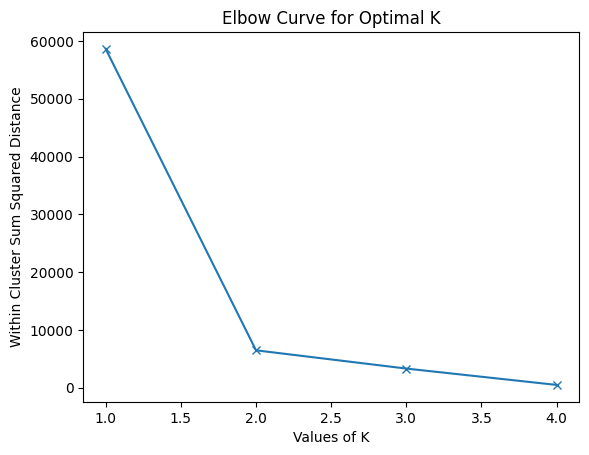

time: 2.11 s (started: 2024-03-17 18:53:15 +00:00)


In [40]:
# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,5) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_km)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [41]:
#Create K-Means Clusters [K=2]

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_km);
km_2cluster_model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

time: 98.4 ms (started: 2024-03-17 18:53:17 +00:00)


In [42]:
#Create K-Means Clusters [K=3]
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_km);
km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, ..., 2, 2, 2], dtype=int32)

time: 377 ms (started: 2024-03-17 18:53:18 +00:00)


In [43]:
#K-Means Clustering Model Evaluation [K=2]

sscore_km_2cluster = sscore(df_km, km_2cluster_model);
sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_km, km_2cluster_model);
dbscore_km_2cluster


0.2577633051566464

time: 51.2 s (started: 2024-03-17 18:53:18 +00:00)


In [44]:
#K-Means Clustering Model Evaluation [K=3]

sscore_km_3cluster = sscore(df_km, km_3cluster_model);
sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_km, km_3cluster_model);
dbscore_km_3cluster

# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)


0.3028366499343325

time: 36.8 s (started: 2024-03-17 18:54:09 +00:00)


In [45]:
#Create a KMeans Cluster Member Dataframe

# Cluster Model Used : km_3cluster_model

df_km_kmcluster = df_km.copy()
df_km_kmcluster.reset_index(level=0, inplace=True, names='index_variable')
df_km_kmcluster['cluster_number'] = km_3cluster_model
df_km_kmcluster.sort_values('cluster_number', inplace=True);
df_km_kmcluster

#mtcars_subset_kmcluster = pd.DataFrame()
#mtcars_subset_kmcluster['Car_Index'] = mtcars_subset.index.values
#mtcars_subset_kmcluster['Cluster_Number'] = km_3cluster_model
#mtcars_subset_kmcluster.sort_values('Cluster_Number', inplace=True); mtcars_subset_kmcluster


,index_variable,Vehicle Type,Traffic Density,cluster_number
36841,36841,1.0,0.294762,0
28942,28942,1.0,0.221426,0
52029,52029,1.0,0.097510,0
24447,24447,1.0,0.137999,0
52027,52027,1.0,0.403821,0
...,...,...,...,...
22289,22289,0.0,0.338643,2
22290,22290,0.0,0.034221,2
22292,22292,0.0,0.035895,2
22196,22196,0.0,0.086260,2


time: 98.1 ms (started: 2024-03-17 18:54:46 +00:00)


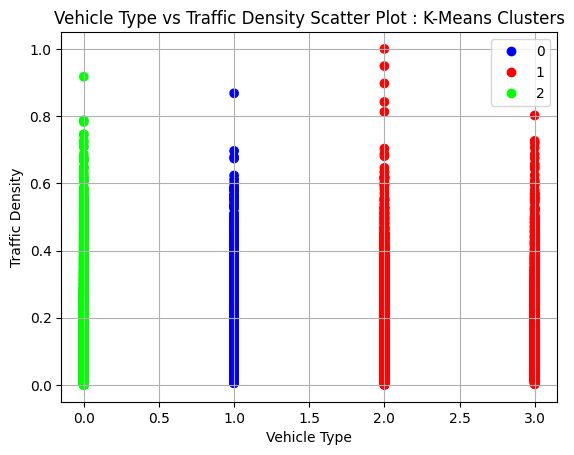

time: 1.94 s (started: 2024-03-17 18:54:46 +00:00)


In [46]:
#Plot the K-Means Clustered Data

# Cluster Model Used : km_3cluster_model

cluster_labels = list(df_km_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='Vehicle Type', y='Traffic Density', data=df_km_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Vehicle Type')
plt.ylabel('Traffic Density')
plt.title('Vehicle Type vs Traffic Density Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

#km_clusterplot_sb = sns.scatterplot(x='hp', y='mpg', hue='cluster_number', palette='brg', data=mtcars_subset_kmcluster)
#km_clusterplot_sb.set(title='Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')


In [2]:
from sklearn.cluster import DBSCAN

# Assuming df is your DataFrame containing the data for clustering
# Perform clustering
dbscan_clusterer = DBSCAN(eps=0.5, min_samples=5)
df_km['cluster_number'] = dbscan_clusterer.fit_predict(df_km[['Vehicle Type', 'Traffic Density']])

# Plot the clustered data
cluster_labels = list(df_km['cluster_number'].unique())
scatter_plot = plt.scatter(x='Vehicle Type', y='Traffic Density', data=df_km, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Vehicle Type')
plt.ylabel('Traffic Density')
plt.title('Vehicle Type vs Traffic Density Scatter Plot : DBSCAN Clusters')
plt.grid()
plt.show()


NameError: name 'df_km' is not defined